### Linear Regression 구현

아래 데이터를 이용하여 각 항목별 연관 관계를 분석하고 선형 회귀 분석 기법을 통해 상관 관계를 그래프로 표시하시오.

• index_price: 물가지수  
• interest_rate: 이자율  
• unemployment_rate: 실업률

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

data = {'year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,
                2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
        'month': [12,11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
        'interest_rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,
                        1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
        'unemployment_rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,
                            5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
        'index_price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,
                    1047,965,943,958,971,949,884,866,876,822,704,719]}
df = pd.DataFrame(data)
print(df)

    year  month  interest_rate  unemployment_rate  index_price
0   2017     12           2.75                5.3         1464
1   2017     11           2.50                5.3         1394
2   2017     10           2.50                5.3         1357
3   2017      9           2.50                5.3         1293
4   2017      8           2.50                5.4         1256
5   2017      7           2.50                5.6         1254
6   2017      6           2.50                5.5         1234
7   2017      5           2.25                5.5         1195
8   2017      4           2.25                5.5         1159
9   2017      3           2.25                5.6         1167
10  2017      2           2.00                5.7         1130
11  2017      1           2.00                5.9         1075
12  2016     12           2.00                6.0         1047
13  2016     11           1.75                5.9          965
14  2016     10           1.75                5.8      

#### 1. 선형 회귀: 이자율과 물가지수 상관 관계 분석

##### 1) 물가지수와 이자율 산점도

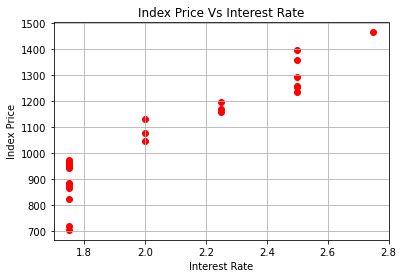

In [58]:
import matplotlib.pyplot as plt

plt.scatter(df['interest_rate'], df['index_price'], color = 'red')
plt.title('Index Price Vs Interest Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Index Price')
plt.grid(True)
plt.show()

In [74]:
from sklearn.model_selection import train_test_split
import numpy as np

interest_rate = np.array(list(df['interest_rate']))
index_price = np.array(list(df['index_price']))

# 훈련 세트와 테스트 세트로 나눔
train_input, test_input, train_target, test_target = train_test_split(
                                                interest_rate, index_price, random_state=42)

# 훈련 세트와 테스트 세트를 2차원 배열로 변경
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [75]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)

print('Interest Rate vs. Index Price')
print('coef_: {}, intercept_: {}'.format(lr.coef_, lr.intercept_))

Interest Rate vs. Index Price
coef_: [574.45637584], intercept_: -127.38255033557084


##### 2) 선형 회귀 분석

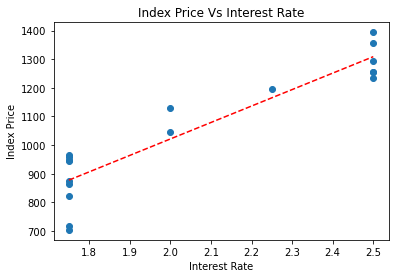

In [76]:
plt.scatter(train_input, train_target)
plt.plot([1.75, 2.50], [1.75*lr.coef_ + lr.intercept_, 2.50*lr.coef_ + lr.intercept_], color='red', linestyle='--')
plt.title('Index Price Vs Interest Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Index Price')
plt.show()

In [77]:
print('train data score: {}'.format(lr.score(train_input, train_target)))
print('test data score: {}'.format(lr.score(test_input, test_target)))

train data score: 0.8541859618501457
test data score: 0.941892392945057


#### 2. 다항 회귀: 이자율과 물가지수 상관 관계 분석

In [78]:
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

print(train_poly[:5])
print(train_poly.shape, test_poly.shape)

[[3.0625 1.75  ]
 [6.25   2.5   ]
 [3.0625 1.75  ]
 [6.25   2.5   ]
 [6.25   2.5   ]]
(18, 2) (6, 2)


In [79]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print('이자율과 물가지수 다항 회귀')
print('다항 회귀 coef_: {}, intercept_: {}'.format(lr.coef_, lr.intercept_))

이자율과 물가지수 다항 회귀
다항 회귀 coef_: [-524.84946237 2802.42473118], intercept_: -2429.102822580652


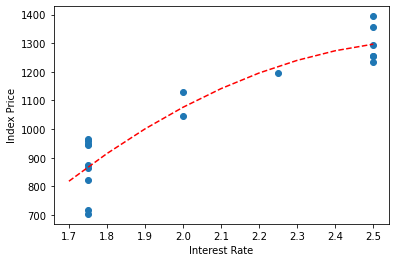

[1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5]


In [92]:
point = np.arange(1.7, 2.6, 0.1) # 간격 0.1

plt.scatter(train_input, train_target)
plt.plot(point, (-524.84946237)*point**2 + 2802.42473118*point - 2429.102822580652, color = 'red', linestyle='--')
plt.xlabel('Interest Rate')
plt.ylabel('Index Price')
plt.show()

print(point)

In [66]:
print('train data score: {}'.format(lr.score(train_poly, train_target)))
print('test data score: {}'.format(lr.score(test_poly, test_target)))

train data score: 0.8676269364555872
test data score: 0.794526521436733


#### 3. 선형 회귀: 실업률과 물가지수 상관 관계 분석

##### 1) 실업률과 물가지수 산점도

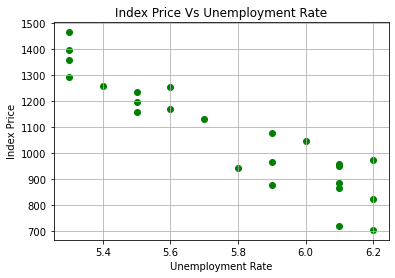

In [67]:
plt.scatter(df['unemployment_rate'], df['index_price'], color = 'green')
plt.title('Index Price Vs Unemployment Rate')
plt.xlabel('Unemployment Rate')
plt.ylabel('Index Price')
plt.grid(True)
plt.show()

##### 2) 선형 회귀 분석

In [68]:
unemployment_rate = np.array(list(df['unemployment_rate']))
index_price = np.array(list(df['index_price']))

# 훈련 세트와 테스트 세트로 나눔
train_input, test_input, train_target, test_target = train_test_split(
                                                unemployment_rate, index_price, random_state=42)

# 훈련 세트와 테스트 세트를 2차원 배열로 변경
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [69]:
lr = LinearRegression()
lr.fit(train_input, train_target)

print('Unemployment Rate vs. Index Price')
print('coef_: {}, intercept_: {}'.format(lr.coef_, lr.intercept_))

Unemployment Rate vs. Index Price
coef_: [-611.41330166], intercept_: 4586.05463182898


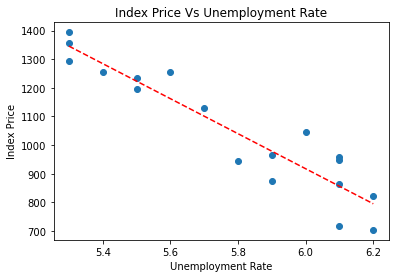

In [70]:
plt.scatter(train_input, train_target)
plt.plot([5.30, 6.20], [5.30*lr.coef_ + lr.intercept_, 6.20*lr.coef_ + lr.intercept_], color='red', linestyle='--')
plt.title('Index Price Vs Unemployment Rate')
plt.xlabel('Unemployment Rate')
plt.ylabel('Index Price')
plt.show()

In [71]:
print('train data score: {}'.format(lr.score(train_input, train_target)))
print('test data score: {}'.format(lr.score(test_input, test_target)))

train data score: 0.8748908875163574
test data score: 0.707475113377226
